### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

### Import Data

In [2]:
footfalls_Data=pd.read_csv('footfalls.csv')
footfalls_Data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
footfalls_Data['date']=pd.to_datetime(footfalls_Data['Month'],format='%b-%y')

In [4]:
footfalls_Data['month']=footfalls_Data['date'].dt.strftime('%b')

In [5]:
footfalls_Data['year']=footfalls_Data['date'].dt.strftime('%Y')

In [6]:
footfalls_Data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


#### Yearwise Footfalls Distribution

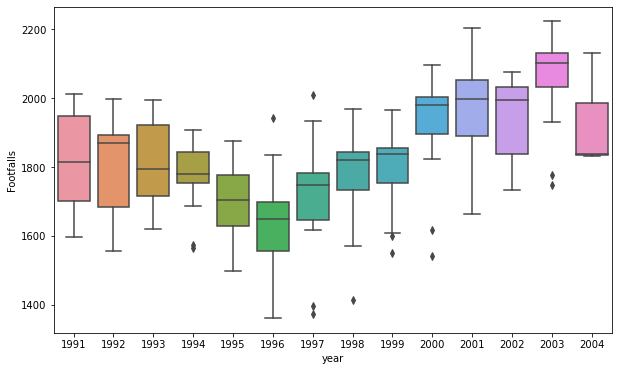

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='Footfalls',data=footfalls_Data)
plt.show()

#### Monthwise Footfalls Distribution

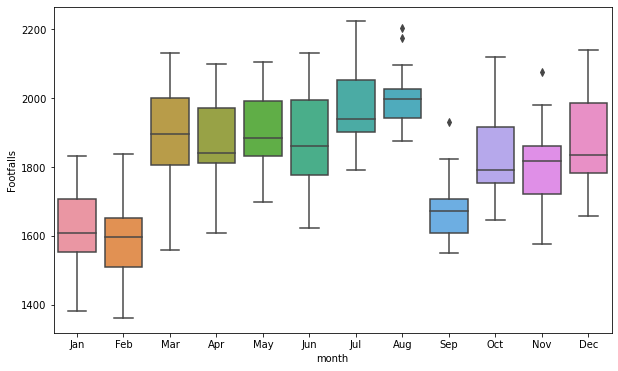

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='Footfalls',data=footfalls_Data)
plt.show()

In [9]:
monthwise_data=pd.pivot_table(data = footfalls_Data,values='Footfalls',index='month',columns='year').fillna(0).astype('int')
monthwise_data

year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
month,,,,,,,,,,,,,,
Apr,1812,1956,1957,1834,1733,1608,1655,1825,1840,1971,2024,2048,2099,0
Aug,2013,1997,1996,1907,1875,1943,2008,1922,1949,2097,2203,2027,2174,0
Dec,1814,1875,1734,1783,1657,1700,1797,1847,1836,2000,1985,1996,2141,0
Feb,1621,1557,1619,1574,1497,1361,1372,1413,1549,1617,1663,1771,1749,1838
Jan,1709,1615,1705,1563,1548,1382,1397,1570,1599,1542,1683,1760,1778,1832
Jul,1940,1903,1933,1868,1792,1836,1934,1968,1966,2054,2127,2075,2223,0
Jun,1862,1623,1882,1776,1761,1693,1776,1826,1865,2010,2073,1994,2130,0
Mar,1973,1891,1837,1903,1798,1559,1708,1755,1832,1920,2008,2020,2066,2132
May,1975,1885,1917,1831,1772,1697,1763,1843,1846,1992,2047,2069,2105,0


### Heatmap - Monthwise Distribution

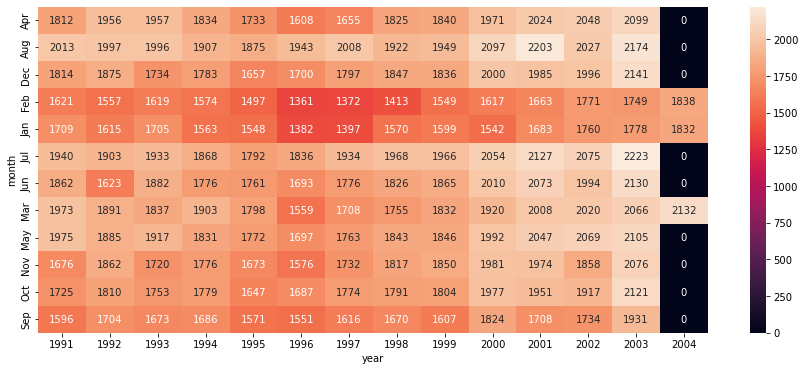

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(monthwise_data,annot=True,fmt='g')
plt.show()

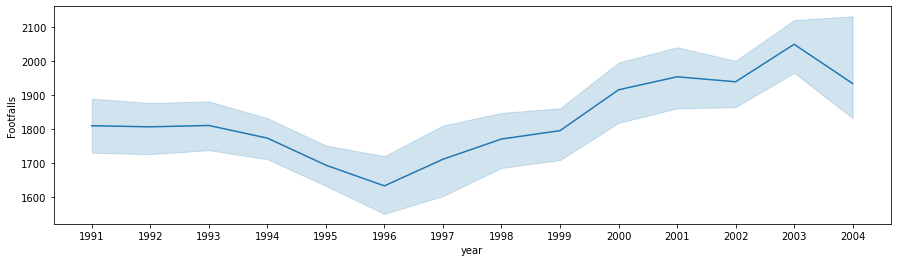

In [11]:
plt.figure(figsize=(15,4))
sns.lineplot(x='year',y='Footfalls',data=footfalls_Data)
plt.show()

### Model Building

In [12]:
footfalls_Data.shape

(159, 20)

In [13]:
training_data=footfalls_Data.head(147)

In [14]:
testing_data=footfalls_Data.tail(12)

In [15]:
training_data.shape,testing_data.shape

((147, 20), (12, 20))

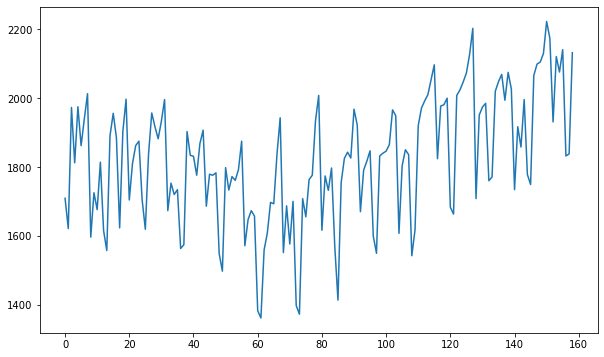

In [16]:
plt.figure(figsize=(10,6))
footfalls_Data['Footfalls'].plot()
plt.show()

#### Linear Model

In [17]:
linear_model=smf.ols('Footfalls~t',data=training_data).fit()

pred_linear = linear_model.predict(testing_data)

rmse_linear=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462546

#### Exponential Model

In [18]:
exponential_model=smf.ols('log_footfalls~t',data=training_data).fit()

pred_exponential = exponential_model.predict(testing_data)

rmse_exponential=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(np.exp(pred_exponential)))**2))
rmse_exponential

217.05263569547816

#### Quadratic Model

In [19]:
quadratic_model=smf.ols('Footfalls~t+t_square',data=training_data).fit()

pred_quadratic = quadratic_model.predict(testing_data)

rmse_quadratic=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(pred_quadratic))**2))
rmse_quadratic

137.15462741356495

#### Additive Seasonality Model

In [20]:
additive_model=smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=training_data).fit()

pred_additive = additive_model.predict(testing_data)

rmse_additive=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(pred_additive))**2))
rmse_additive

264.6643900568787

#### Additive Seasonality with Quadratic Trend Model

In [21]:
additive_quad_model=smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=training_data).fit()

pred_additive_quad = additive_quad_model.predict(testing_data)

rmse_additive_quad=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(pred_additive_quad))**2))
rmse_additive_quad

50.607245841536

#### Multiplicative Model

In [22]:
multiplicative_model=smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=training_data).fit()

pred_multiplicative = multiplicative_model.predict(testing_data)

rmse_multiplicative=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(np.exp(pred_multiplicative)))**2))
rmse_multiplicative

268.19703252663464

### Compare the Results

In [23]:
Results = pd.DataFrame(
    data={"MODEL":pd.Series(['Linear','Exponential','Quadrative','Additive','Additive with Quadrative','Multiplicative']),
          "RMSE":pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive,rmse_additive_quad,rmse_multiplicative])})
Results.sort_values('RMSE')

,MODEL,RMSE
4,Additive with Quadrative,50.607246
2,Quadrative,137.154627
0,Linear,209.925593
1,Exponential,217.052636
3,Additive,264.664390
5,Multiplicative,268.197033


### Build the Intelligence for the Complete Data

In [24]:
final_model=smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=footfalls_Data).fit()

In [25]:
final_test_data=pd.read_csv('Predict_Footfalls.csv')
final_test_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561


### Model Prediction/Testing

In [26]:
pred_final = final_model.predict(final_test_data)

rmse_final=np.sqrt(np.mean((np.array(testing_data['Footfalls'])-np.array(pred_final))**2))
rmse_final

120.56458714370676

In [27]:
final_test_data['predicted_value']=pred_final.round().astype('int')
final_test_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,predicted_value
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2194
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2230
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2201
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2311
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2356
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2037
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2187
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2181
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2234
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2000


In [28]:
full_data=pd.concat([footfalls_Data,final_test_data])
full_data.tail(12)

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,date,month,year,predicted_value
0,04-Apr,NaN,160,NaN,25600,0,0,0,1,0,...,0,0,0,0,0,0,NaT,NaN,NaN,2194.0
1,04-May,NaN,161,NaN,25921,0,0,0,0,1,...,0,0,0,0,0,0,NaT,NaN,NaN,2230.0
2,04-Jun,NaN,162,NaN,26244,0,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,2201.0
3,04-Jul,NaN,163,NaN,26569,0,0,0,0,0,...,1,0,0,0,0,0,NaT,NaN,NaN,2311.0
4,04-Aug,NaN,164,NaN,26896,0,0,0,0,0,...,0,1,0,0,0,0,NaT,NaN,NaN,2356.0
5,04-Sep,NaN,165,NaN,27225,0,0,0,0,0,...,0,0,1,0,0,0,NaT,NaN,NaN,2037.0
6,04-Oct,NaN,166,NaN,27556,0,0,0,0,0,...,0,0,0,1,0,0,NaT,NaN,NaN,2187.0
7,04-Nov,NaN,167,NaN,27889,0,0,0,0,0,...,0,0,0,0,1,0,NaT,NaN,NaN,2181.0
8,04-Dec,NaN,168,NaN,28224,0,0,0,0,0,...,0,0,0,0,0,1,NaT,NaN,NaN,2234.0
9,05-Jan,NaN,169,NaN,28561,1,0,0,0,0,...,0,0,0,0,0,0,NaT,NaN,NaN,2000.0


### Visualization

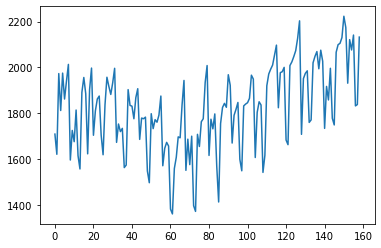

In [29]:
full_data['Footfalls'].plot()
plt.show()

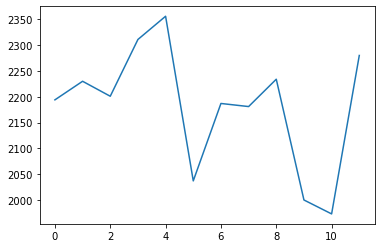

In [30]:
full_data['predicted_value'].plot()
plt.show()

<AxesSubplot:>

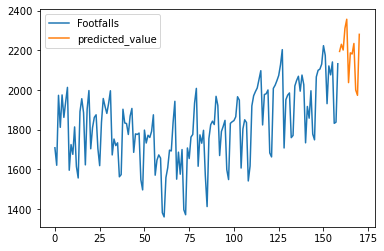

In [31]:
full_data[['Footfalls','predicted_value']].reset_index(drop=True).plot()

### End !!!